Importamos las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importación de la tabla de datos
ejercicio = pd.read_excel("data/ejercicio.xlsx")

In [3]:
# Para ver el archivo de datos
ejercicio.head()

,GUIA,Edad,Sexo,Vivo,TAs,TAd,ACV,ACVTIPO
0,1,67,M,S,230,110,S,ISQUEMICO
1,2,81,F,N,160,100,S,HEMORRAGICO
2,3,61,M,S,170,110,N,NOCORRES
3,4,66,M,N,120,80,N,NOCORRES
4,5,65,M,S,210,110,N,NOCORRES


Debemos saber que contienen nuestras variables. miremos la variable Vivo:

In [4]:
ejercicio['Vivo'].unique()

array(['S', 'N', 'n'], dtype=object)

Si no recodificamos esa N minuscula, vamos a tener muchos problemas

In [5]:
# Recodificación
ejercicio['Vivo'] = ejercicio['Vivo'].replace('n', 'N')

Volvemos a chequear

In [32]:
ejercicio['Vivo'].unique()

array(['S', 'N'], dtype=object)

In [6]:
# Convertir valores de texto a categorías y luego a códigos numéricos
ejercicio['Sexo'] = pd.Categorical(ejercicio['Sexo'], categories=["F", "M"]).codes+1
ejercicio['ACV'] = pd.Categorical(ejercicio['ACV'], categories=["N", "S"]).codes
ejercicio['ACVTIPO'] = pd.Categorical(ejercicio['ACVTIPO'], categories=["NOCORRES","HEMORRAGICO", "ISQUEMICO", "TIA"]).codes 
ejercicio['Vivo'] = pd.Categorical(ejercicio['Vivo'], categories=["N", "S"]).codes

In [8]:
# Tabla de frecuencia absoluta para una variable
print(ejercicio['ACVTIPO'].value_counts())
print("----------------------------")
print(ejercicio['Sexo'].value_counts())
print("----------------------------")
print(ejercicio['Vivo'].value_counts())
print("----------------------------")
print(ejercicio['ACV'].value_counts())

0    164
2     19
1      6
3      6
Name: ACVTIPO, dtype: int64
----------------------------
1    100
2     95
Name: Sexo, dtype: int64
----------------------------
1    120
0     75
Name: Vivo, dtype: int64
----------------------------
0    164
1     31
Name: ACV, dtype: int64


In [9]:
# Tabla de frecuencia relativa para una variable
print(ejercicio['ACVTIPO'].value_counts(normalize=True))  # en base 1

0    0.841026
2    0.097436
1    0.030769
3    0.030769
Name: ACVTIPO, dtype: float64


In [10]:
ejercicio['ACVTIPO'].value_counts(normalize=True) * 100  # como porcentaje

0    84.102564
2     9.743590
1     3.076923
3     3.076923
Name: ACVTIPO, dtype: float64

In [11]:
# Tabla de frecuencia absoluta para una variable con total
ejercicio['ACVTIPO'].value_counts().append(pd.Series({'Total': ejercicio['ACVTIPO'].count()}))

C:\Users\Manuel\AppData\Local\Temp\ipykernel_7540\2506800030.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ejercicio['ACVTIPO'].value_counts().append(pd.Series({'Total': ejercicio['ACVTIPO'].count()}))


0        164
2         19
1          6
3          6
Total    195
dtype: int64

In [12]:
# Tabla de contingencia frecuencias absolutas
pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'])

ACVTIPO,0,1,2,3
Sexo,,,,
1,87,5,6,2
2,77,1,13,4


In [73]:
# Tabla de contingencia frecuencias relativas
print(pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], normalize='all').apply(lambda r: r/r.sum(), axis=1))
print("------------------------------------------------")
print(pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], normalize='index').apply(lambda r: r/r.sum(), axis=1))
print("------------------------------------------------")
print(pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], normalize='columns').apply(lambda r: r/r.sum(), axis=0))

ACVTIPO         0         1         2         3
Sexo                                           
1        0.870000  0.050000  0.060000  0.020000
2        0.810526  0.010526  0.136842  0.042105
------------------------------------------------
ACVTIPO         0         1         2         3
Sexo                                           
1        0.870000  0.050000  0.060000  0.020000
2        0.810526  0.010526  0.136842  0.042105
------------------------------------------------
ACVTIPO         0         1         2         3
Sexo                                           
1        0.530488  0.833333  0.315789  0.333333
2        0.469512  0.166667  0.684211  0.666667


In [74]:
# Tabla de contingencia frecuencias absolutas con totales
print(pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], margins=True))

print("----------------------------")

# Tabla de contingencia frecuencias absolutas con totales y missings
print(pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], margins=True, dropna=False))

ACVTIPO    0  1   2  3  All
Sexo                       
1         87  5   6  2  100
2         77  1  13  4   95
All      164  6  19  6  195
----------------------------
ACVTIPO    0  1   2  3  All
Sexo                       
1         87  5   6  2  100
2         77  1  13  4   95
All      164  6  19  6  195


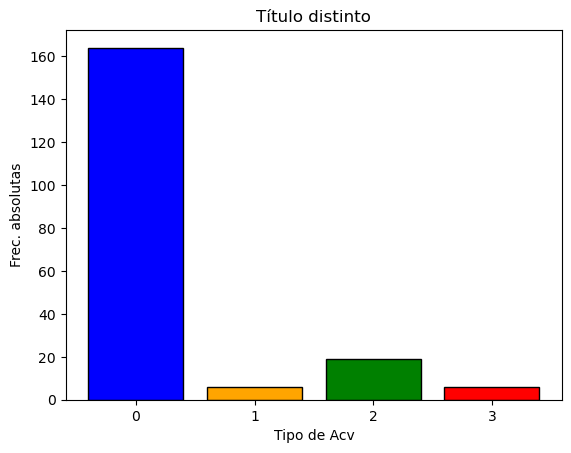

In [59]:
# Gráfico de barras de la frecuencia absoluta de tipo de ACV
acv_counts = ejercicio['ACVTIPO'].value_counts().sort_index()
plt.bar(acv_counts.index, acv_counts.values, color=['blue', 'orange', 'green', 'red'], edgecolor='black')  # Colores distintos para cada modalidad
plt.title('Título distinto')
plt.xlabel('Tipo de Acv')
plt.ylabel('Frec. absolutas')
plt.xticks(ticks=range(len(acv_counts)), labels=acv_counts.index)  # Eje X con categorías enteras
plt.show()

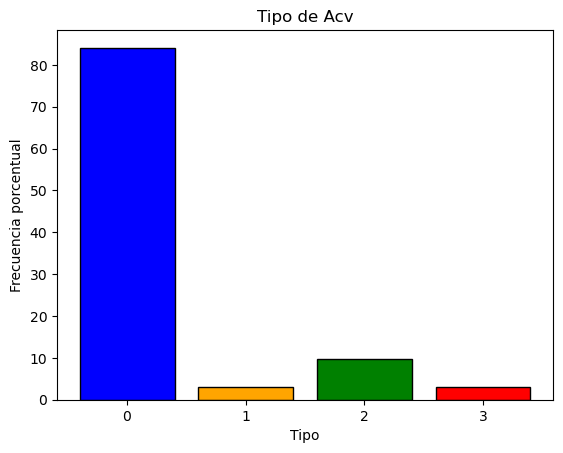

In [61]:
# Gráfico de barras de la frecuencia relativa de tipo de ACV
acv_relative_counts = ejercicio['ACVTIPO'].value_counts(normalize=True).sort_index()
plt.bar(acv_relative_counts.index, acv_relative_counts.values * 100, color=['blue', 'orange', 'green', 'red'], edgecolor='black')  # Colores distintos para cada modalidad
plt.title('Tipo de Acv')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia porcentual')
plt.xticks(ticks=range(len(acv_relative_counts)), labels=acv_relative_counts.index)  # Eje X con categorías enteras
plt.show()

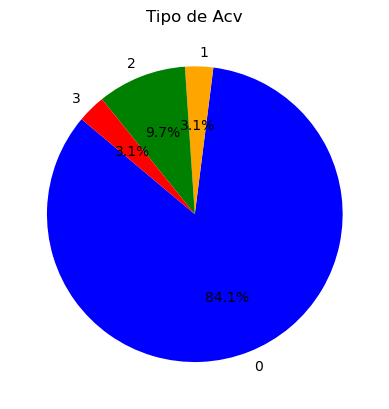

In [63]:
# Gráfico de tortas básico
acv_counts = ejercicio['ACVTIPO'].value_counts().sort_index()
plt.pie(acv_counts, labels=acv_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'], startangle=140)
plt.title('Tipo de Acv')
plt.show()

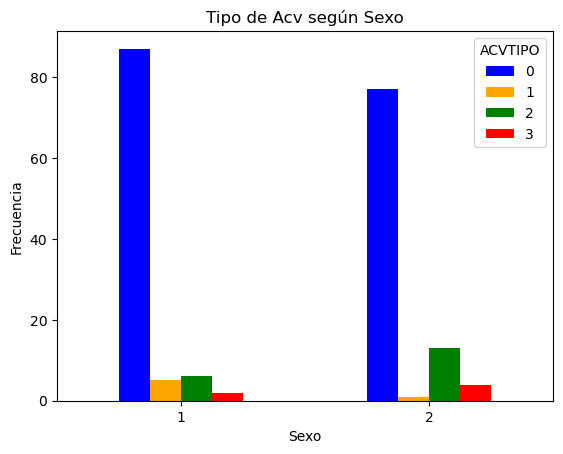

In [66]:
# Gráfico de barras para dos variables (frecuencias absolutas) con colores específicos
crosstab_abs = pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO']).sort_index()
crosstab_abs.plot(kind='bar', stacked=False, color=['blue', 'orange', 'green', 'red'])  # Colores específicos para las modalidades de ACVTIPO
plt.title('Tipo de Acv según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(crosstab_abs.index)), labels=crosstab_abs.index, rotation=0)  # Eje X con categorías enteras
plt.show()

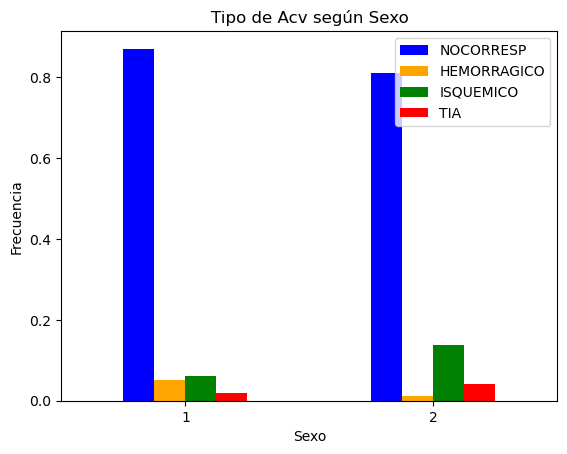

In [68]:
# Gráfico de barras para dos variables (frecuencias relativas por columna) con colores específicos
crosstab_rel = pd.crosstab(ejercicio['Sexo'], ejercicio['ACVTIPO'], normalize='index').sort_index()
crosstab_rel.plot(kind='bar', stacked=False, color=['blue', 'orange', 'green', 'red'])  # Colores específicos para las modalidades de ACVTIPO
plt.title('Tipo de Acv según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(crosstab_rel.index)), labels=crosstab_rel.index, rotation=0)  # Eje X con categorías enteras
plt.legend(['NOCORRESP','HEMORRAGICO', 'ISQUEMICO','TIA'], loc='upper right')
plt.show()